# HW 5: Exploring Sample Statistics through Simulation
## Due: Friday 18, 23:59.
## Points: 5

## Problem Description:

In this assignment, you will investigate how sample statistics behave under different conditions using simulation. You'll generate random samples from various distributions, calculate key statistics, and visualize the results. This process will help you understand concepts such as sampling variability, the effect of sample size on estimation precision, and the behavior of confidence intervals.

The true distribution from which we sample represents the population. Our goal is to estimate population parameters using sample data and understand how these estimates behave under different conditions.

### Central Limit Theorem (CLT) and Simulation Approach:

The Central Limit Theorem states that the distribution of sample means approximates a normal distribution as the sample size increases, regardless of the underlying population distribution (assuming the population has a finite variance). This powerful theorem allows us to make inferences about population parameters using sample statistics. You will see CLT in action through this homework.

### Distributions

In this homework, we will investigate three distributions: Normal distribution, Bernoulli distribution, and Binomial distribution. The homework will walk you through the simulation process for Normal distribution. You will have to replicate the simulations for Bernoulli and Binomial by yourself.

<br>

---

## 1. Normal Distribution Simulation (3 points)

Import necessary libraries:

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *

1.1 Create a function to simulate samples from a normal distribution:

- We will use numpy for this. See the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html).

In [ ]:
def simulate_normal_samples(mean, std_dev, num_samples):
  samples = np.random.normal(loc=mean, scale=std_dev, size=num_samples)
  return samples.tolist()

1.2 Simulate data for different sample sizes and standard deviations: (1 point)

- The list of sample sizes and standard deviations are provided below.

- For this problem, your task is to create a DataFrame `df` that contains the summary statistics of each simulated sample. Your DataFrame should consists of the following columns:

 - `sample_size`: The size of each sample drawn from the population
 - `std_dev`: The standard deviation of the population from which samples are drawn
 - `sample_id`:  An identifier for each simulated sample dataset.
 - `sample_mean`: The mean of the sample dataset. This one you must calculate it.
 - `sample_std`: The standard deviation of the sample dataset. This one you must calcualte it.

**Note on the sample standard deviation**
- To calculate the *unbiased* sample standard deviation, divide by $\frac{1}{N-1}$ instead of by $\frac{1}{N}$. If you use/plan to use numpy.std, set the degree of freedom to 1, `ddof=1` ([documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html)).
- The proof is beyond the scope of this class but you can read more here, [Bessel Correction](https://en.wikipedia.org/wiki/Bessel%27s_correction)

In [ ]:
# Parameters
n_simulation = 1000
sample_sizes = [10, 30, 50, 100, 500]
std_list = [0.5, 1, 3]
mean = 0
results = []

# 1000(5)(3) = 15,000
for i in range(n_simulation):#1000
  for sample_size in sample_sizes:#10,30,50,100,5000
    for std_dev in std_list:#0.5,1,3

            sample = simulate_normal_samples(mean, std_dev, sample_size)
            #Mean
            sample_mean = np.mean(sample)
            #Std
            sample_std = np.std(sample, ddof=1)

            results.append({
                'sample_size': sample_size,
                'std_dev': std_dev,
                'sample_id': i,
                'sample_mean': sample_mean,
                'sample_std': sample_std
            })

df = pd.DataFrame(results)

# Display the DataFrame
print(df)


       sample_size  std_dev  sample_id  sample_mean  sample_std
0               10      0.5          0    -0.146176    0.555546
1               10      0.5          1     0.044690    0.466685
2               10      0.5          2     0.044069    0.579775
3               10      0.5          3     0.036135    0.398609
4               10      0.5          4     0.005441    0.353953
...            ...      ...        ...          ...         ...
14995          500      3.0        995     0.138056    3.015856
14996          500      3.0        996     0.088232    3.055230
14997          500      3.0        997     0.181324    3.065471
14998          500      3.0        998     0.111864    2.922339
14999          500      3.0        999     0.000843    2.965746

[15000 rows x 5 columns]


1.3 (0.33 point) Calculate the standard error for each combination:

- Add a new column `se` for each combination.
- Use `sample_std` to calculate `se`

In [ ]:
df['se'] = df['sample_std'] / np.sqrt(df['sample_size'])

df.head()

,sample_size,std_dev,sample_id,sample_mean,sample_std,se
0,10,0.5,0,-0.146176,0.555546,0.175679
1,10,0.5,1,0.044690,0.466685,0.147579
2,10,0.5,2,0.044069,0.579775,0.183341
3,10,0.5,3,0.036135,0.398609,0.126051
4,10,0.5,4,0.005441,0.353953,0.111930


1.4 (0.33 point) Calculate the 95% confidence interval (CI) for each combination:

- Add two new columns `ci_lower` and `cl_upper`:
  - `ci_lower` = mean - 1.96*se
  - `ci_upper` = mean + 1.96*se

In [ ]:
df['ci_lower'] = df['sample_mean'] - (1.96 * df['se'])
df['ci_upper'] = df['sample_mean'] + (1.96 * df['se'])

df.head()

,sample_size,std_dev,sample_id,sample_mean,sample_std,se,ci_lower,ci_upper,includes_true_mean
0,10,0.5,0,-0.146176,0.555546,0.175679,-0.490507,0.198154,True
1,10,0.5,1,0.044690,0.466685,0.147579,-0.244564,0.333944,True
2,10,0.5,2,0.044069,0.579775,0.183341,-0.315279,0.403417,True
3,10,0.5,3,0.036135,0.398609,0.126051,-0.210925,0.283196,True
4,10,0.5,4,0.005441,0.353953,0.111930,-0.213942,0.224823,True


1.5 (0.34 point) Add a column indicating whether the confidence interval includes the true mean (0):

In [ ]:
df['includes_true_mean'] = ((df['ci_lower'] <= 0) & (df['ci_upper'] >= 0))

df.head()
df.tail()

,sample_size,std_dev,sample_id,sample_mean,sample_std,se,ci_lower,ci_upper,includes_true_mean
14995,500,3.0,995,0.138056,3.015856,0.134873,-0.126295,0.402408,True
14996,500,3.0,996,0.088232,3.055230,0.136634,-0.179570,0.356035,True
14997,500,3.0,997,0.181324,3.065471,0.137092,-0.087377,0.450024,True
14998,500,3.0,998,0.111864,2.922339,0.130691,-0.144290,0.368019,True
14999,500,3.0,999,0.000843,2.965746,0.132632,-0.259116,0.260803,True


1.6 (1 point) Create histograms for the sample means

Plot Description:
- Create a separate plot for each standard deviation
- X-axis: mean
- Y-axis: Frequency (count)
- Add blue dashed vertical lines for the true population mean. ([documentation](https://plotnine.org/reference/geom_vline.html))
- facet_wrap: `sample_size`. ([documentation](https://plotnine.org/reference/facet_wrap.html))
- Use a histogram to represent the distribution of sample data. Try a very small `bin_width` like 0.01 or smaller.
- Adjust the size of the graph using `theme(figure_size=(x,y))`
- Title: "Distribution of Sample Data (Std Dev = {})"

**Note**: Pay attention to the shape of the distributions and the count.

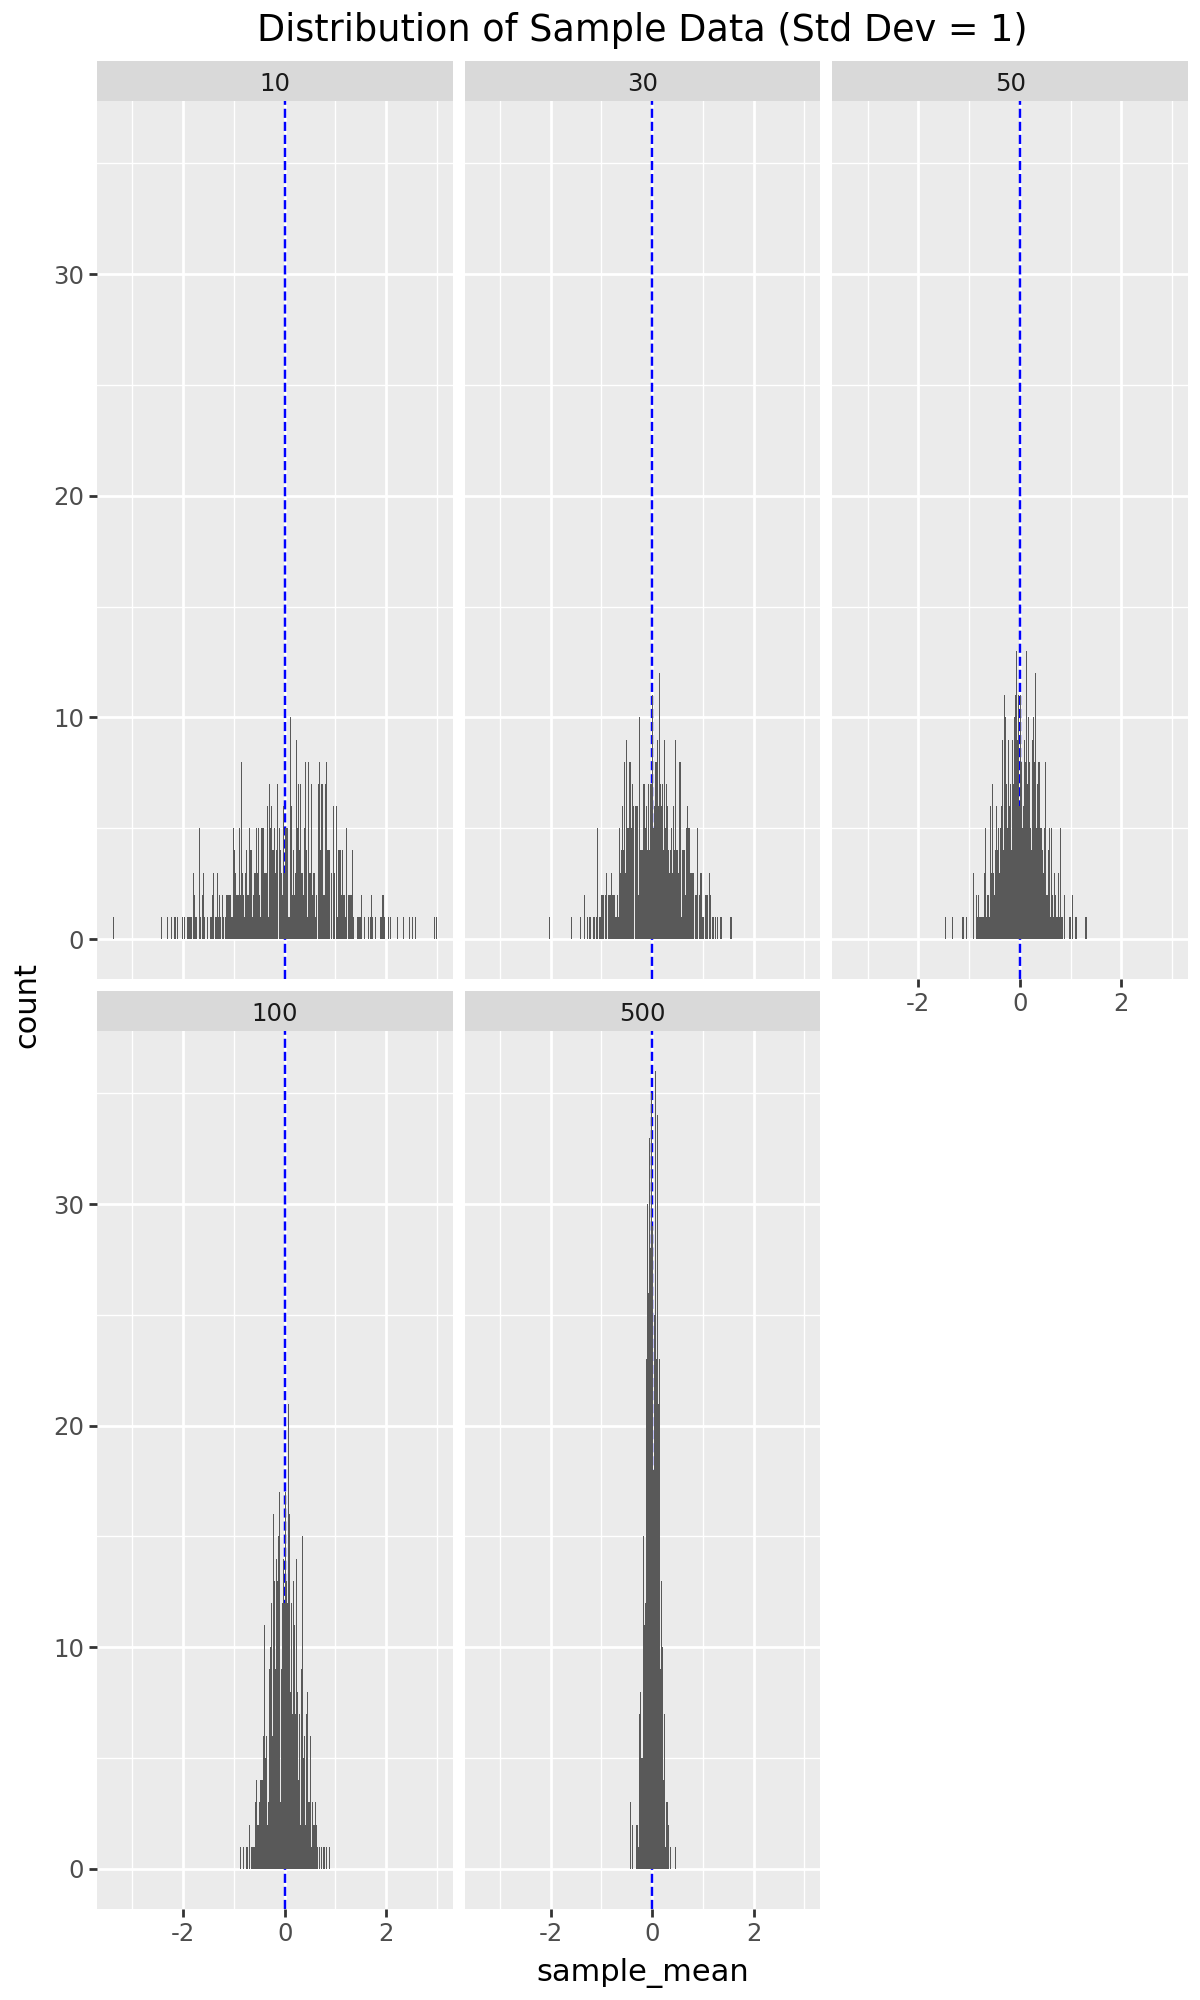

In [ ]:
SM3 = (ggplot(
            df[df['std_dev'] == 3],
            aes(x = 'sample_mean'))
            + geom_vline(xintercept = 0, linetype = 'dashed', color = 'blue')
            + geom_histogram(binwidth = 0.01)
            + facet_wrap('~sample_size')
            + theme(figure_size = (6, 10))
            + labs(title = f"Distribution of Sample Data (Std Dev = {std_dev})")
)
SM3

1.7 (1 point) Create plots for confidence intervals

Plot description:

- Create a separate plot for each combination of sample size and standard deviation
- X-axis: Confidence interval width
- Y-axis: Sample ID (1 - 100 only)
- Color: Different colors based on whether the CI includes the true mean
- Use points with error bars to represent the confidence intervals
  - To create error bars in the horizontal direction, use `geom_errorbarh()`. See the [documentation](https://plotnine.org/reference/geom_errorbarh.html).
- Add black dashed vertical lines (geom_vline) at the true mean
- facet_wrap: `sample_size`
- Title: "Confidence Intervals (Std Dev = {})"

**Note**:
- Notice how many confident interval not included the true mean?
- You may want to repeat the simulation a few more times to see whether or not the results stay the same. It's a probabilistic simulation after all.

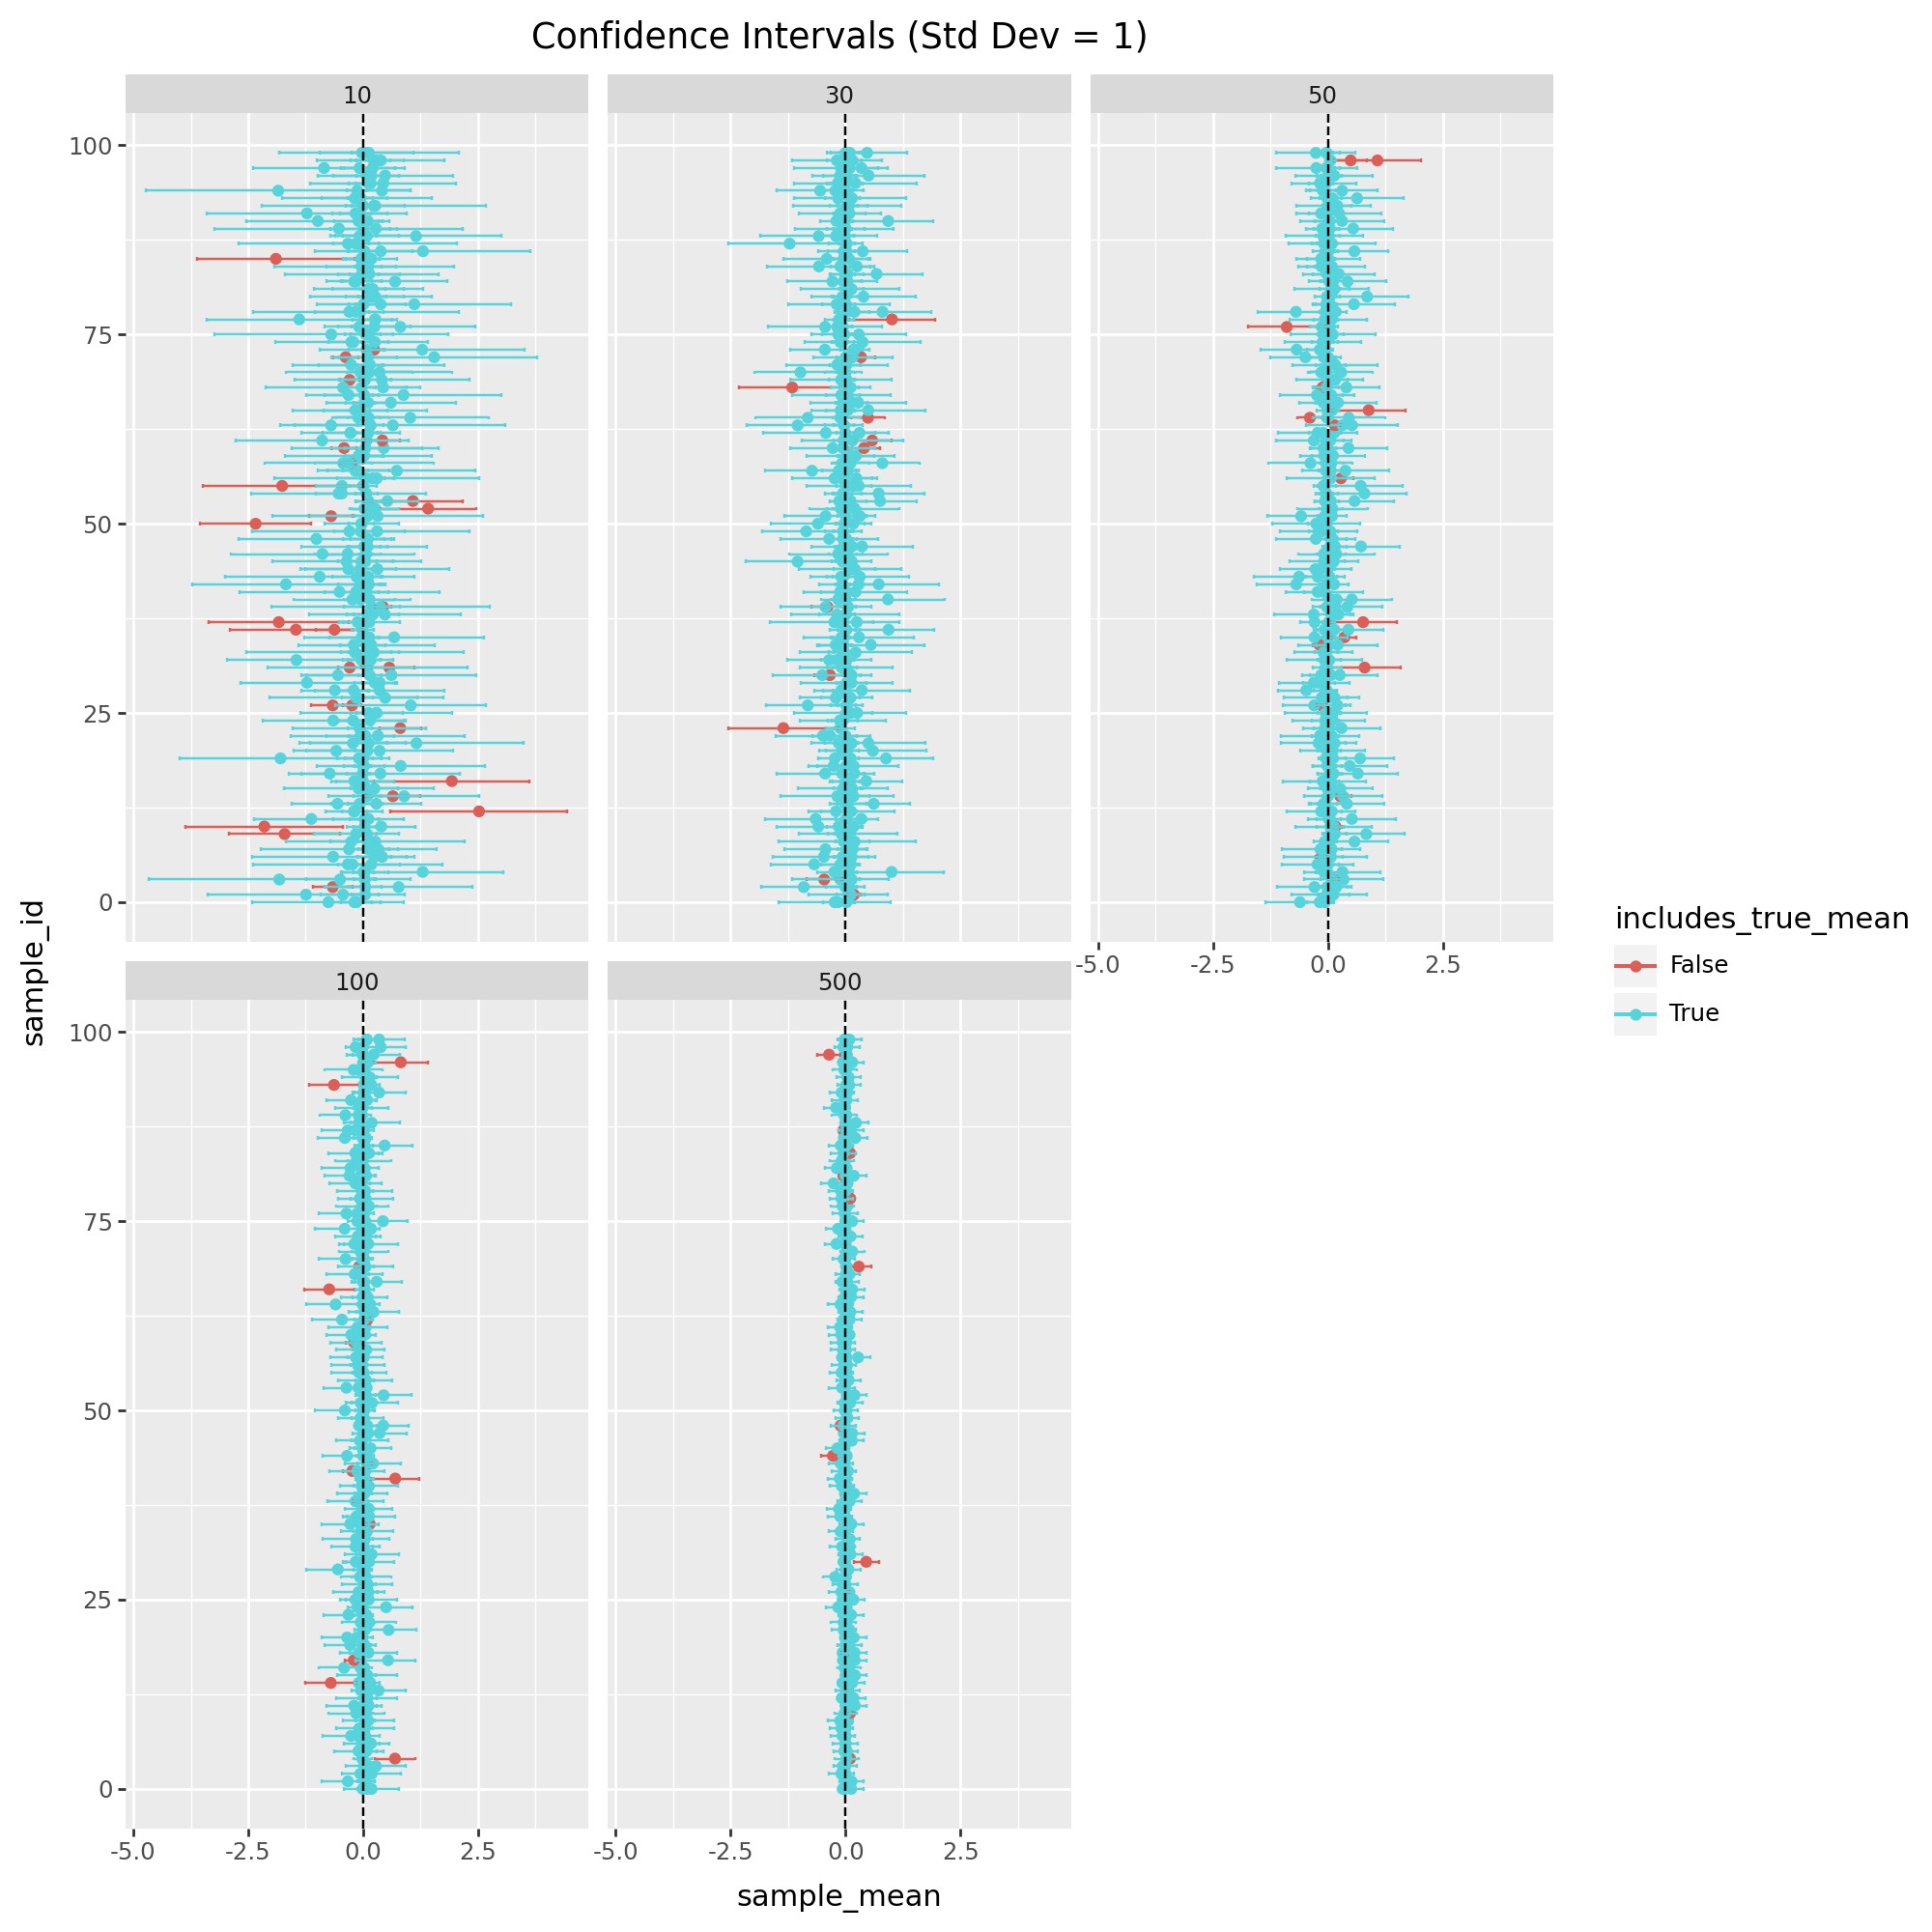

In [ ]:
std_dev = 1
CI1 = (
      ggplot(
            df[df['sample_id'] < 100],
            aes(x = 'sample_mean', y = 'sample_id', color = 'includes_true_mean'))
                + geom_point()
                + geom_errorbarh(aes(xmin = 'ci_lower', xmax = 'ci_upper'))
                + geom_vline(xintercept = 0, linetype = 'dashed', color = 'black')
                + facet_wrap('~sample_size')
                + theme(figure_size = (10, 10))
                + labs(title = f'Confidence Intervals (Std Dev = {std_dev})')
)
CI1

## 2: Bernoulli Distribution Simulation (1 Point)

- Repeat the above exercise for Bernoulli Distribution

2.1 Create a function to simulate samples from a Bernoulli distribution:
- You can use `numpy.random.binomial` with `n=1`

In [ ]:
def simulate_bernoulli_samples(probability_of_success, num_samples):
  samples = np.random.binomial(n=1, p=probability_of_success, size=num_samples)
  return samples.tolist()


2.2 Repeat the normal distribution simluations for the Bernoulli distribution.
- The mean of the Bernoulli is `p`.



In [ ]:
n_simulation = 1000
sample_sizes = [10, 30, 50, 100, 500]
p_list = [0.1, 0.3, 0.5]
results = []

for i in range(n_simulation):
  for sample_size in sample_sizes:
    for p in p_list:
      sample = simulate_bernoulli_samples(p, sample_size)
      sample_mean = np.mean(sample)
      sample_std = np.std(sample, ddof=1)

      results.append({
          'sample_size': sample_size,
          'p': p,
          'sample_id': i,
          'sample_mean': sample_mean,
          'sample_std': sample_std
      })

df_bernoulli = pd.DataFrame(results)

df_bernoulli['se'] = df_bernoulli['sample_std'] / np.sqrt(df_bernoulli['sample_size'])
df_bernoulli['ci_lower'] = df_bernoulli['sample_mean'] - (1.96 * df_bernoulli['se'])
df_bernoulli['ci_upper'] = df_bernoulli['sample_mean'] + (1.96 * df_bernoulli['se'])
df_bernoulli['includes_true_mean'] = ((df_bernoulli['ci_lower'] <= p) & (df_bernoulli['ci_upper'] >= p))

df_bernoulli.head()


,sample_size,p,sample_id,sample_mean,sample_std,se,ci_lower,ci_upper,includes_true_mean
0,10,0.1,0,0.300000,0.483046,0.152753,0.000605,0.599395,True
1,10,0.3,0,0.400000,0.516398,0.163299,0.079933,0.720067,True
2,10,0.5,0,0.100000,0.316228,0.100000,-0.096000,0.296000,False
3,30,0.1,0,0.033333,0.182574,0.033333,-0.032000,0.098667,False
4,30,0.3,0,0.466667,0.507416,0.092641,0.285090,0.648243,True


## 3: Binomial Distribution Simulation (1 point)
- Repeat the above exercise for Binomial Distribution

3.1 Create a function to simulate samples from a Binomial distribution:

In [ ]:
def simulate_binomial_samples(n, probability_of_success, num_samples):
  samples = np.random.binomial(n=n, p=probability_of_success, size=num_samples)
  return samples.tolist()

3.2 Repeat the normal distribution simluations for the Binomial distribution.
- The mean of the Binomial is `np`.

In [ ]:
n_simulation = 1000
sample_sizes = [10, 30, 50, 100, 500]
p_list = [0.1, 0.3, 0.5]
n = 50
results = []

for i in range(n_simulation):
  for sample_size in sample_sizes:
    for p in p_list:
      sample = simulate_binomial_samples(n, p, sample_size)
      sample_mean = np.mean(sample)
      sample_std = np.std(sample, ddof=1)

      results.append({
          'sample_size': sample_size,
          'p': p,
          'n': n,
          'sample_id': i,
          'sample_mean': sample_mean,
          'sample_std': sample_std
      })

df_binomial = pd.DataFrame(results)

df_binomial['se'] = df_binomial['sample_std'] / np.sqrt(df_binomial['sample_size'])
df_binomial['ci_lower'] = df_binomial['sample_mean'] - (1.96 * df_binomial['se'])
df_binomial['ci_upper'] = df_binomial['sample_mean'] + (1.96 * df_binomial['se'])
df_binomial['includes_true_mean'] = ((df_binomial['ci_lower'] <= n * p) & (df_binomial['ci_upper'] >= n * p))

df_binomial.head()


#จะตายครับอาจารย์ โหดเกิน เกือบไม่เสร็จ;-;

,sample_size,p,n,sample_id,sample_mean,sample_std,se,ci_lower,ci_upper,includes_true_mean
0,10,0.1,50,0,4.100000,2.330951,0.737111,2.655262,5.544738,False
1,10,0.3,50,0,13.600000,2.756810,0.871780,11.891312,15.308688,False
2,10,0.5,50,0,24.900000,2.424413,0.766667,23.397333,26.402667,True
3,30,0.1,50,0,5.000000,1.761661,0.321634,4.369598,5.630402,False
4,30,0.3,50,0,15.066667,4.042305,0.738021,13.620146,16.513187,False
